In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import os
import math

In [62]:
class_names = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']

In [63]:
model = models.load_model('image_classifier_model')

## Test single image

In [64]:
img = cv.imread('test images/32x32/birs_1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

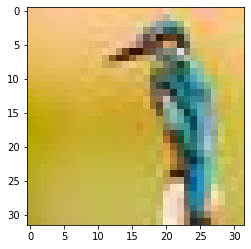

In [65]:
plt.imshow(img, cmap=plt.cm.binary)

In [66]:
pred = model.predict(np.array([img]) / 255)  # Here the image should be passed as an numpy array, this gives 10 activations.
ind = np.argmax(pred) # here we are getting index of the maximum value of 0ut of those 10
print(f'prediction is {class_names[ind]}')

1/1 [==============================] - 0s 58ms/step
prediction is Birds


In [67]:
pred

array([[6.4413399e-03, 1.3217956e-04, 9.7043884e-01, 6.8396437e-03,
        7.6531956e-04, 8.8804020e-03, 2.9964797e-04, 2.3276452e-03,
        8.9538378e-05, 3.7855166e-03]], dtype=float32)

## Test list of images

### Creating an images list

In [68]:
image_list = []
folder_path = 'test images\\32x32'
file_list = os.listdir(folder_path)

In [69]:
for i in range(len(file_list)):
    image_path = os.path.join(folder_path, file_list[i])
    image_list.append(cv.imread(image_path))
    image_list[i] = cv.cvtColor(image_list[i], cv.COLOR_BGR2RGB)

### Pedicting result

In [70]:
prediction_list = []
for k in range(len(image_list)):
    prediction = model.predict(np.array([image_list[k]])/255)
    index = np.argmax(prediction)
    prediction_list.append(class_names[index])
    print(f'prediction {k+1} is {prediction_list[k]}')
    

1/1 [==============================] - 0s 14ms/step
prediction 1 is Birds
1/1 [==============================] - 0s 14ms/step
prediction 2 is Cars
1/1 [==============================] - 0s 14ms/step
prediction 3 is Dogs
1/1 [==============================] - 0s 14ms/step
prediction 4 is Deer
1/1 [==============================] - 0s 13ms/step
prediction 5 is Dogs
1/1 [==============================] - 0s 14ms/step
prediction 6 is Cats
1/1 [==============================] - 0s 14ms/step
prediction 7 is Trucks
1/1 [==============================] - 0s 14ms/step
prediction 8 is Deer
1/1 [==============================] - 0s 14ms/step
prediction 9 is Birds
1/1 [==============================] - 0s 14ms/step
prediction 10 is Airplanes
1/1 [==============================] - 0s 14ms/step
prediction 11 is Birds


In [71]:
print(f'prediction is a {prediction_list}')

prediction is a ['Birds', 'Cars', 'Dogs', 'Deer', 'Dogs', 'Cats', 'Trucks', 'Deer', 'Birds', 'Airplanes', 'Birds']


Predicted Result


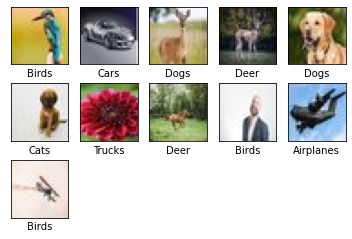

In [72]:
print('Predicted Result')
for l in range(len(prediction_list)):
    plt.subplot(math.ceil(len(prediction_list)/5),5,1+l)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_list[l],cmap = plt.cm.binary)
    plt.xlabel(prediction_list[l])